In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv("gplay.csv")

In [51]:
# EDA

df.shape

(10841, 10)

In [52]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [53]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [54]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [55]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
dtypes: float64(1), object(8)
memory usage: 762.4+ KB


In [57]:
df[df["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


In [58]:
df.drop(10472,inplace=True)

In [59]:
df["Rating"].fillna(df["Rating"].median(),inplace=True)

In [60]:
df[df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+


In [61]:
df["Type"].fillna("Free",inplace=True)

In [62]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [63]:
df["Price"] = df["Price"].apply(lambda price : float(price.replace("$","")))

In [64]:
df["Price"] = df["Price"]*72

In [65]:
df["Price"].unique()

array([    0.  ,   359.28,   287.28,   503.28,   107.28,   215.28,
         575.28,   431.28,   251.28,   143.28,   719.28,   539.28,
          71.28,   648.  ,   395.28,   720.  ,  1799.28,   863.28,
        5759.28,  1223.28,  1079.28,    72.  ,  2159.28,   935.28,
         179.28,   791.28,   108.  ,  1439.28,  1151.28,  2447.28,
        5399.28,  2879.28,   284.4 ,   323.28,   122.4 ,   647.28,
         144.  ,   279.36,  1871.28, 28799.28,  1295.28, 28800.  ,
         217.44,   126.72,   348.48,   343.44,   115.92,   180.  ,
         114.48,   467.28,    92.88,   360.  ,  1007.28, 21599.28,
       27359.28,  2735.28,  1367.28, 28079.28,  1432.8 ,   611.28,
         126.  ,  1008.  ,   349.2 ,  3383.28,  7919.28, 11159.28,
         221.76,   186.48,   345.6 ,   141.12,  1396.8 ,   280.8 ,
         330.48,  1113.12,   218.88,   308.88,   187.2 ,   236.16,
         331.2 ,  2087.28,   212.4 ,   208.8 ,   141.84, 14400.  ,
        6479.28,   184.32,  2231.28,   259.92, 28439.28,    90

In [66]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [67]:
def clean_size(size):
    if size[-1] == "M":
        return float(size[:-1])
    elif size[-1] == "k":
        return (float(size[:-1])/1024)
    else:
        return np.nan

In [68]:
df["Size"] = df["Size"].apply(clean_size)

In [69]:
df["Size"].fillna(df["Size"].mean(),inplace=True)

In [70]:
df["Installs"] = df["Installs"].apply(lambda install : int(install.replace("+","").replace(",","")))

In [71]:
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 846.9+ KB


In [73]:
# separate numerical and categorical data

df_num = df.select_dtypes([float,int])
df_cat = df.select_dtypes(object)

In [74]:
df_num.head()

,Rating,Size,Price
0,4.1,19.0,0.0
1,3.9,14.0,0.0
2,4.7,8.7,0.0
3,4.5,25.0,0.0
4,4.3,2.8,0.0


In [75]:
df_cat.head()

,App,Category,Reviews,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,967,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,Everyone


In [76]:
# numerical data

In [77]:
df_num.describe()

,Rating,Size,Price
count,10840.000000,10840.000000,10840.000000
mean,4.206476,21.516165,73.970502
std,0.480342,20.747804,1148.378650
min,1.000000,0.008301,0.000000
25%,4.100000,5.900000,0.000000
50%,4.300000,18.000000,0.000000
75%,4.500000,26.000000,0.000000
max,5.000000,100.000000,28800.000000


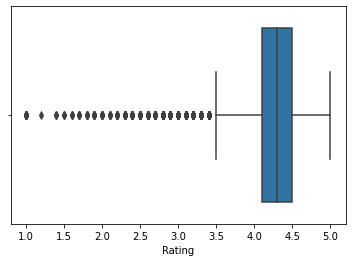

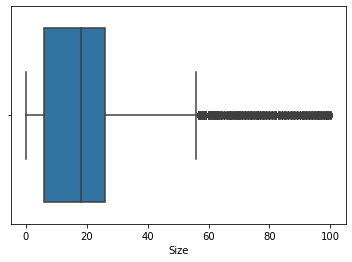

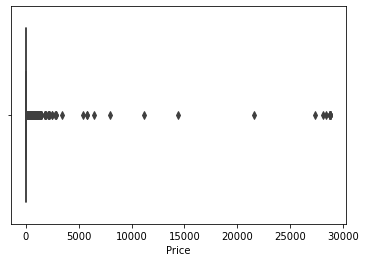

In [78]:
for col in df_num:
    plt.figure()
    sns.boxplot(df_num[col])
    plt.show()

In [79]:
q1 = np.quantile(df["Installs"], 0.25)
q3 = np.quantile(df["Installs"], 0.75)
iqr = q3 - q1
uw = q3 + 1.5*iqr
uw

12498500.0

In [80]:
outlier_Installs = df[df["Installs"] >= uw]

In [81]:
outlier_Installs

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21.516165,100000000,Free,0.0,Teen
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21.516165,100000000,Free,0.0,Teen
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21.516165,1000000000,Free,0.0,Teen
188,Indeed Job Search,BUSINESS,4.3,674730,21.516165,50000000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54.000000,50000000,Free,0.0,Everyone
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21.000000,50000000,Free,0.0,Everyone
10549,Toy Truck Rally 3D,GAME,4.0,301895,25.000000,50000000,Free,0.0,Everyone
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,21.516165,100000000,Free,0.0,Everyone


In [82]:
# bivariate analysis

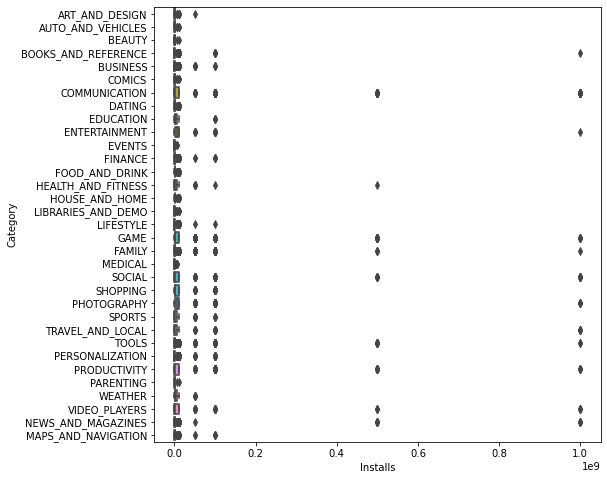

In [83]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df, x="Installs", y="Category")
plt.show()

In [84]:
from scipy.stats import skew

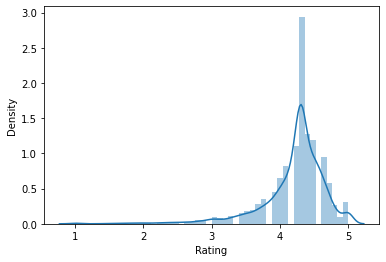

-2.0622331413108674


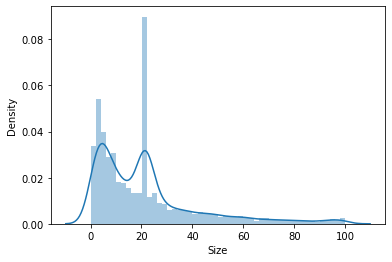

1.6952280712481216


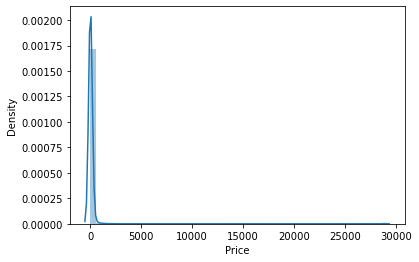

23.704111710375965


In [85]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print(skew(df_num[col]))

In [86]:
for col in df_num:
    if skew(df_num[col]) > 0.5 or skew(df_num[col]) < -0.5:
        #df_num[col] = np.log(df_num[col])
        df_num[col] = np.sqrt(df_num[col])

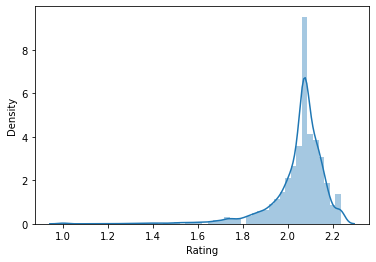

-2.7418083144155587


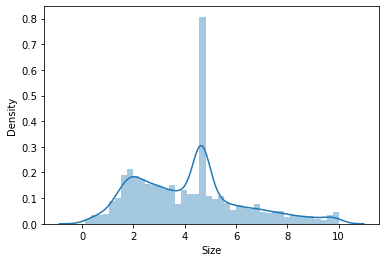

0.6057714384950597


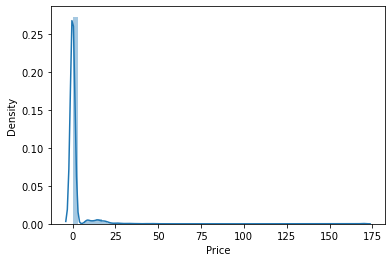

13.606978090660016


In [87]:
for col in df_num:
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print(skew(df_num[col]))

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [91]:
for col in df_num:
    mm = MinMaxScaler()
    df_num[col] = mm.fit_transform(df_num[[col]])

In [92]:
df_num.head()

,Rating,Size,Price
0,0.829118,0.430703,0.0
1,0.788664,0.368411,0.0
2,0.944890,0.288475,0.0
3,0.907167,0.495403,0.0
4,0.868596,0.159676,0.0


In [93]:
# Catgorical

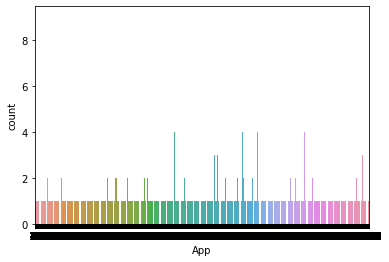

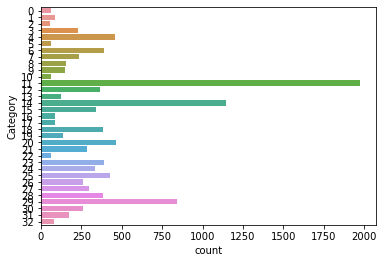

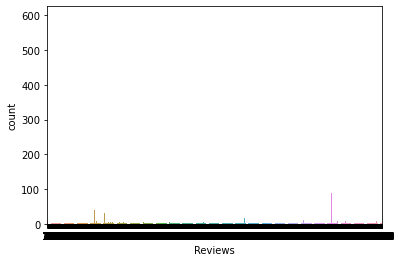

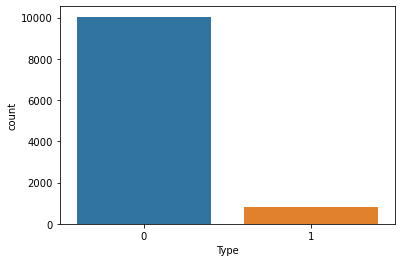

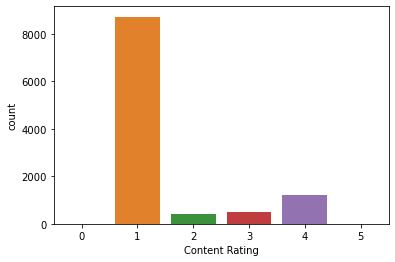

In [112]:
for col in df_cat:
    plt.figure()
    if col == "Category":
        sns.countplot(data=df_cat,y=col)
    else:
        sns.countplot(data=df_cat,x=col)
    plt.show()

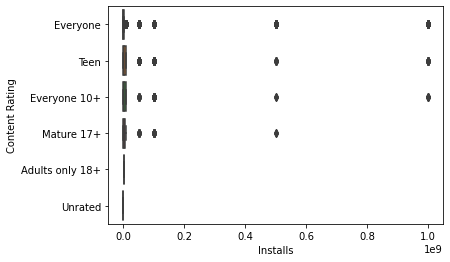

In [97]:
plt.figure()
sns.boxplot(data=df, x="Installs", y="Content Rating")
plt.show()

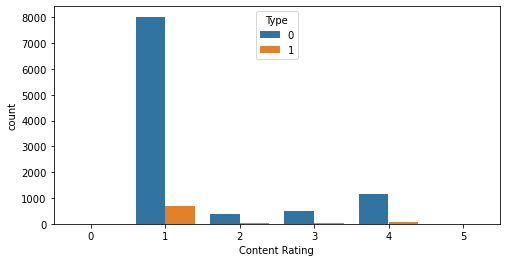

In [115]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_cat,x="Content Rating",hue="Type")
plt.show()

In [99]:
pd.get_dummies(df_cat["Category"])

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
# label encoding

In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [103]:
df_cat.head()

,App,Category,Reviews,Type,Content Rating
0,6962,0,1182,0,1
1,2632,0,5922,0,1
2,8656,0,5679,0,1
3,7827,0,1946,0,4
4,7022,0,5922,0,1


In [104]:
df_final = pd.concat([df_cat,df_num],axis=1)

In [105]:
df_final.head()

,App,Category,Reviews,Type,Content Rating,Rating,Size,Price
0,6962,0,1182,0,1,0.829118,0.430703,0.0
1,2632,0,5922,0,1,0.788664,0.368411,0.0
2,8656,0,5679,0,1,0.944890,0.288475,0.0
3,7827,0,1946,0,4,0.907167,0.495403,0.0
4,7022,0,5922,0,1,0.868596,0.159676,0.0


In [108]:
# Feature engineering
df_final["area"] = df_final["Size"] * df_final["Rating"]

In [109]:
df_final.head()

,App,Category,Reviews,Type,Content Rating,Rating,Size,Price,area
0,6962,0,1182,0,1,0.829118,0.430703,0.0,0.357104
1,2632,0,5922,0,1,0.788664,0.368411,0.0,0.290553
2,8656,0,5679,0,1,0.944890,0.288475,0.0,0.272577
3,7827,0,1946,0,4,0.907167,0.495403,0.0,0.449413
4,7022,0,5922,0,1,0.868596,0.159676,0.0,0.138694
